In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io 
from PIL import Image 
import numpy as np

In [2]:
demo_fruitnut = pd.read_csv('../data/fruittreenuttotals_demographics.csv')
demo_berries = pd.read_csv('../data/demographics_berries.csv')
demo_citrus = pd.read_csv('../data/demographics_citrus.csv')
demo_vegetables = pd.read_csv('../data/demographics_vegetables.csv')

In [3]:
citrus_state = pd.read_csv('../data/fruit/citrus_state.csv')

In [4]:
citrus_area_state = citrus_state.loc[(citrus_state['Data Item'] == 'CITRUS TOTALS - ACRES BEARING & NON-BEARING')
                    & (citrus_state['Domain'] == 'TOTAL')]

In [5]:
citrus_area_state = citrus_area_state.loc[citrus_area_state['Value'] != ' (D)']
citrus_area_state = citrus_area_state.loc[citrus_area_state['Value'] != ' (Z)']
citrus_area_state['Value'] = citrus_area_state['Value'].str.replace(',', '')
citrus_area_state['Value'] = pd.to_numeric(citrus_area_state.Value, downcast='integer').fillna(0)
citrus_area_state

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
38,CENSUS,2022,YEAR,NaN,STATE,ALABAMA,1,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,309,9.2
144,CENSUS,2022,YEAR,NaN,STATE,ARIZONA,4,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,7257,34.1
315,CENSUS,2022,YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,341591,12.7
496,CENSUS,2022,YEAR,NaN,STATE,FLORIDA,12,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,382803,14.5
647,CENSUS,2022,YEAR,NaN,STATE,GEORGIA,13,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,1583,23.5
739,CENSUS,2022,YEAR,NaN,STATE,HAWAII,15,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,9649,1.0
827,CENSUS,2022,YEAR,NaN,STATE,LOUISIANA,22,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,549,42.1
904,CENSUS,2022,YEAR,NaN,STATE,MISSISSIPPI,28,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,69,41.9
1004,CENSUS,2022,YEAR,NaN,STATE,SOUTH CAROLINA,45,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,11,57.9
1098,CENSUS,2022,YEAR,NaN,STATE,TEXAS,48,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,27060,6.8


In [6]:
citrus_area_state.to_csv(path_or_buf = 'citrus_area_state.csv', index = False)

In [7]:
all_commoditites = pd.read_csv('../data/commodity_totals.csv')

In [8]:
comm_income_by_sales = all_commoditites.loc[all_commoditites['Domain'] == 'FARM SALES']
comm_income_by_sales

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
30,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",FARM SALES,"FARM SALES: (1,000 TO 2,499 $)","292,472,000",4.3
31,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",FARM SALES,"FARM SALES: (1,000,000 OR MORE $)","425,365,347,000",2.5
32,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",FARM SALES,"FARM SALES: (1,000,000 TO 2,499,999 $)","95,707,152,000",5.0
33,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",FARM SALES,"FARM SALES: (10,000 TO 19,999 $)","2,386,213,000",2.3
34,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",FARM SALES,"FARM SALES: (10,000 TO 24,999 $)","3,566,948,000",2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,CENSUS,1997,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",FARM SALES,"FARM SALES: (5,000,000 OR MORE $)","40,369,882,000",NaN
536,CENSUS,1997,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",FARM SALES,"FARM SALES: (50,000 TO 99,999 $)","11,716,046,000",NaN
537,CENSUS,1997,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",FARM SALES,"FARM SALES: (500,000 OR MORE $)","112,962,373,000",NaN
538,CENSUS,1997,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",FARM SALES,"FARM SALES: (500,000 TO 999,999 $)","30,138,101,000",NaN


In [9]:
comm_income_by_sales = comm_income_by_sales.loc[comm_income_by_sales['Value'] != ' (D)']
comm_income_by_sales = comm_income_by_sales.loc[comm_income_by_sales['Value'] != ' (Z)']
comm_income_by_sales['Value'] = comm_income_by_sales['Value'].str.replace(',', '')
comm_income_by_sales['Value'] = pd.to_numeric(comm_income_by_sales.Value, downcast='integer').fillna(0)

In [10]:
comm_income_by_sales['Domain Category'] = comm_income_by_sales['Domain Category'].str[13:-1]

In [11]:
comm_income_by_sales = comm_income_by_sales.groupby(
                ['Year','Domain Category']).sum(
                'Value').fillna(0).reset_index()
comm_income_by_sales

,Year,Domain Category,Week Ending,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Value,CV (%)
0,1997,"1,000 TO 2,499 $",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,461290000,0.0
1,1997,"1,000,000 OR MORE $",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,82824271000,0.0
2,1997,"1,000,000 TO 2,499,999 $",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,28603612000,0.0
3,1997,"10,000 TO 19,999 $",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3218769000,0.0
4,1997,"100,000 TO 249,999 $",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,30406176000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2022,"5,000,000 OR MORE $",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,228735891000,2.1
104,2022,"50,000 TO 99,999 $",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,8237216000,3.5
105,2022,"500,000 OR MORE $",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,473614327000,2.1
106,2022,"500,000 TO 999,999 $",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,48248980000,2.4


In [12]:
comm_income_by_sales_piv = comm_income_by_sales.pivot(index = 'Year', columns = 'Domain Category', values = 'Value').reset_index()
comm_income_by_sales_piv = comm_income_by_sales_piv.iloc[:, np.r_[0:1,3:14,16,18:19]]

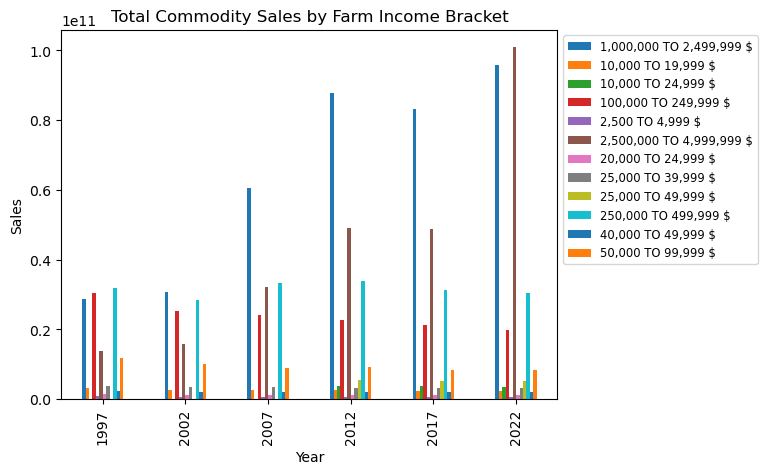

In [13]:
comm_income_by_sales_plot = comm_income_by_sales_piv.plot(x = 'Year', y = list(
    comm_income_by_sales_piv.columns[1:13]), kind = "bar", title = "Total Commodity Sales by Farm Income Bracket",
                                                 ylabel = "Sales").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
comm_income_by_sales_plot.savefig('comm_income_by_sales_plot.png', transparent=True, bbox_inches='tight')

In [14]:
all_commoditites['Domain Category'].unique()

array(['AREA OPERATED: (1,000 TO 1,999 ACRES)',
       'AREA OPERATED: (1.0 TO 9.9 ACRES)',
       'AREA OPERATED: (10.0 TO 49.9 ACRES)',
       'AREA OPERATED: (100 TO 139 ACRES)',
       'AREA OPERATED: (140 TO 179 ACRES)',
       'AREA OPERATED: (180 TO 219 ACRES)',
       'AREA OPERATED: (2,000 OR MORE ACRES)',
       'AREA OPERATED: (220 TO 259 ACRES)',
       'AREA OPERATED: (260 TO 499 ACRES)',
       'AREA OPERATED: (50.0 TO 69.9 ACRES)',
       'AREA OPERATED: (500 TO 999 ACRES)',
       'AREA OPERATED: (70.0 TO 99.9 ACRES)',
       'CONCENTRATION: (TOP 10 PCT OF OPERATIONS ON FARM SALES BASIS)',
       'CONCENTRATION: (TOP 25 PCT OF OPERATIONS ON FARM SALES BASIS)',
       'CONCENTRATION: (TOP 50 PCT OF OPERATIONS ON FARM SALES BASIS)',
       'CONCENTRATION: (TOP 75 PCT OF OPERATIONS ON FARM SALES BASIS)',
       'ECONOMIC CLASS: (1,000 TO 2,499 $)',
       'ECONOMIC CLASS: (1,000,000 OR MORE $)',
       'ECONOMIC CLASS: (1,000,000 TO 2,499,999 $)',
       'ECONOMIC CLASS: (

In [15]:
demo_vegetables['Domain Category'].unique()

array(['PRODUCERS: (ETHNICITY = HISPANIC)',
       'PRODUCERS: (RACE = ASIAN, ALONE OR COMBINED WITH OTHER RACES)',
       'ORGANIZATION: (TAX PURPOSES, CORPORATION)',
       'ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXCL FAMILY HELD))',
       'ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXCL FAMILY HELD), LE 10 STOCKHOLDERS)',
       'ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMILY HELD)',
       'ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMILY HELD, LE 10 STOCKHOLDERS)',
       'ORGANIZATION: (TAX PURPOSES, FAMILY & INDIVIDUAL)',
       'ORGANIZATION: (TAX PURPOSES, INSTITUTIONAL & RESEARCH & RESERVATION & OTHER)',
       'ORGANIZATION: (TAX PURPOSES, PARTNERSHIP)',
       'ORGANIZATION: (TAX PURPOSES, PARTNERSHIP, REGISTERED UNDER STATE LAW)',
       'PRODUCERS: (1 PRODUCERS)', 'PRODUCERS: (2 PRODUCERS)',
       'PRODUCERS: (3 TO 4 PRODUCERS)',
       'PRODUCERS: (5 OR MORE PRODUCERS)', 'TENURE: (FULL OWNER)',
       'TENURE: (PART OWNER)', 'TENURE: (TENANT)',
       'ORGANIZATI

In [16]:
demo_vegetables['Data Item'].unique()

array(['VEGETABLE TOTALS, IN THE OPEN - ACRES HARVESTED',
       'VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODUCTION',
       'VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WITH AREA IN PRODUCTION',
       'VEGETABLE TOTALS, IN THE OPEN, IRRIGATED - ACRES IN PRODUCTION',
       'VEGETABLE TOTALS, IN THE OPEN, IRRIGATED - OPERATIONS WITH AREA IN PRODUCTION',
       'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN THE OPEN - OPERATIONS WITH SALES',
       'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN THE OPEN - SALES, MEASURED IN $',
       'VEGETABLE TOTALS - ACRES IN PRODUCTION',
       'VEGETABLE TOTALS - OPERATIONS WITH AREA IN PRODUCTION',
       'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS - OPERATIONS WITH SALES',
       'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS - SALES, MEASURED IN $',
       'VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WITH AREA HARVESTED'],
      dtype=object)

In [17]:
vegetable_sales = demo_vegetables.loc[(demo_vegetables['Data Item'] == 'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN THE OPEN - SALES, MEASURED IN $')
                    & (demo_vegetables['Domain'] == 'ORGANIZATION')]
vegetable_sales

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
185,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION)","13,633,175,000",6.1
186,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...","2,626,748,000",11.2
187,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...","1,468,122,000",3.8
188,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...","11,006,426,000",6.3
189,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...","10,491,666,000",6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48209,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...",(D),(D)
48210,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, FAMILY & INDIVIDUAL)","188,000",32.7
48211,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, INSTITUTIONAL & R...",(D),(D)
48212,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, PARTNERSHIP)",(D),(D)


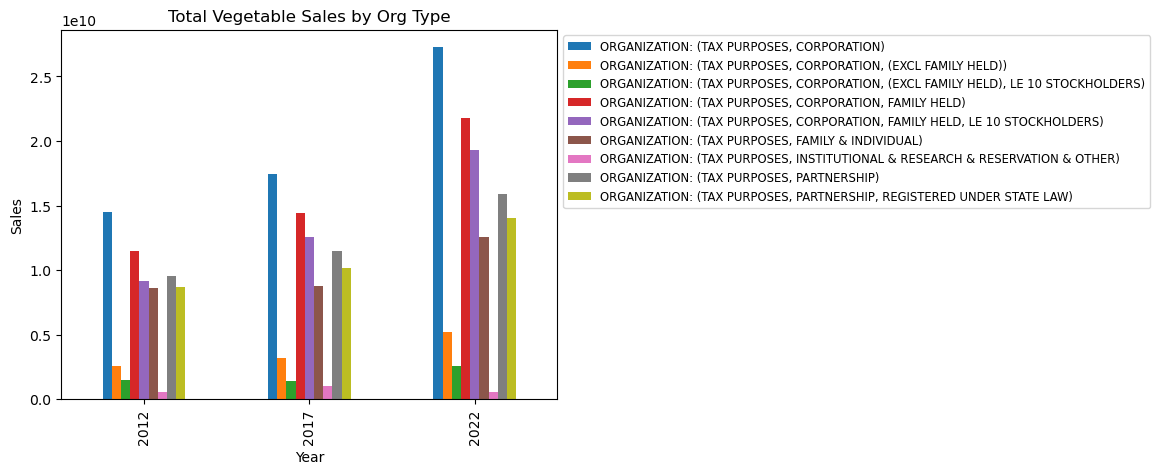

In [18]:
vegetable_sales = vegetable_sales.loc[vegetable_sales['Value'] != ' (D)']
vegetable_sales = vegetable_sales.loc[vegetable_sales['Value'] != ' (Z)']
vegetable_sales['Value'] = vegetable_sales['Value'].str.replace(',', '')
vegetable_sales['Value'] = pd.to_numeric(vegetable_sales.Value, downcast='integer').fillna(0)
vegetable_sales = vegetable_sales.groupby(
                ['Year','Domain Category']).sum(
                'Value').fillna(0).reset_index()
vegetable_sales_piv = vegetable_sales.pivot(index = 'Year', columns = 'Domain Category', values = 'Value').reset_index()
vegetable_sales_plot = vegetable_sales_piv.plot(x = 'Year', y = list(
    demo_vegetables['Domain Category'].loc[(demo_vegetables['Domain'] == 'ORGANIZATION')].unique()), kind = "bar", title = "Total Vegetable Sales by Org Type",
                                                 ylabel = "Sales").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
vegetable_sales_plot.savefig('vegetable_sales_plot.png', transparent=True, bbox_inches='tight')

In [19]:
demo_fruitnut['Data Item'].unique()

array(['FRUIT & TREE NUT TOTALS - OPERATIONS WITH SALES',
       'FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $',
       'FRUIT & TREE NUT TOTALS, (EXCL BERRIES) - OPERATIONS WITH SALES',
       'FRUIT & TREE NUT TOTALS, (EXCL BERRIES) - SALES, MEASURED IN $'],
      dtype=object)

In [20]:
fruit_sales = demo_fruitnut.loc[(demo_fruitnut['Data Item'] == 'FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $')
                    & (demo_fruitnut['Domain'] == 'ORGANIZATION')]
fruit_sales

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
39,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION)","14,127,174,000",11.2
40,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...","3,199,501,000",13.3
41,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...","2,226,720,000",14.3
42,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...","10,927,673,000",11.0
43,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...","9,882,279,000",9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29657,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...","54,000",(H)
29658,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...",(D),(D)
29659,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, FAMILY & INDIVIDUAL)",(D),(D)
29660,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, PARTNERSHIP)",(D),(D)


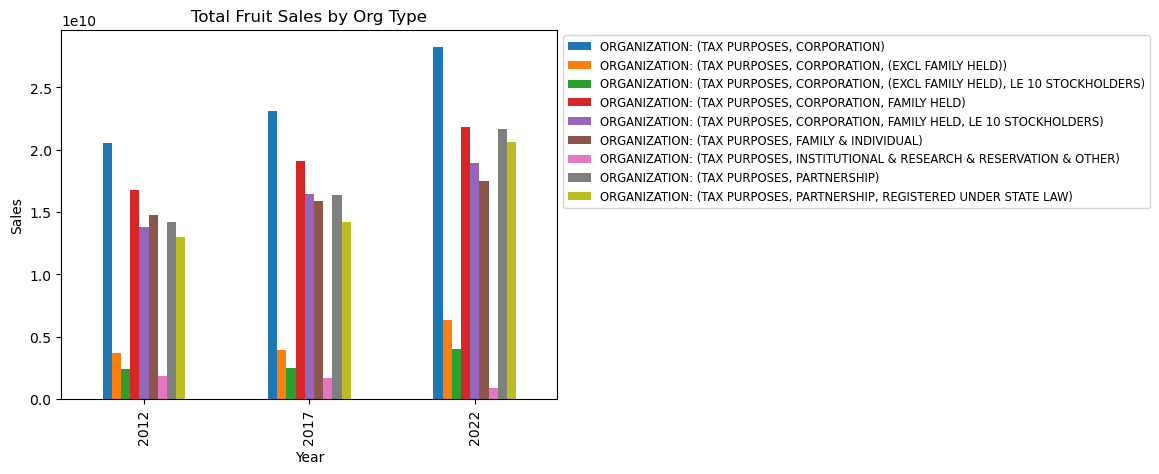

In [21]:
fruit_sales = fruit_sales.loc[fruit_sales['Value'] != ' (D)']
fruit_sales = fruit_sales.loc[fruit_sales['Value'] != ' (Z)']
fruit_sales['Value'] = fruit_sales['Value'].str.replace(',', '')
fruit_sales['Value'] = pd.to_numeric(fruit_sales.Value, downcast='integer').fillna(0)
fruit_sales = fruit_sales.groupby(
                ['Year','Domain Category']).sum(
                'Value').fillna(0).reset_index()
fruit_sales_piv = fruit_sales.pivot(index = 'Year', columns = 'Domain Category', values = 'Value').reset_index()
fruit_sales_plot = fruit_sales_piv.plot(x = 'Year', y = list(
    demo_fruitnut['Domain Category'].loc[(demo_fruitnut['Domain'] == 'ORGANIZATION')].unique()), kind = "bar", title = "Total Fruit Sales by Org Type",
                                                 ylabel = "Sales").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
fruit_sales_plot.savefig('fruit_sales_plot.png', transparent=True, bbox_inches='tight')